## Dublin Bike Pre Processing data 

In [3]:
#import necessary libraries and files 
import pandas as pd
import numpy as np
import warnings
import time
import datetime as dt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


%matplotlib inline

In [4]:
import os
import glob

In [5]:
os.getcwd()
old_dir = os.getcwd()
print(os.getcwd())
#os.chdir("../")

C:\Users\imeld\work\ML-Project


In [6]:
# constant value switches
MAKE_FILES=True
READ_FILES = False
FILE_MASK = "dublinbikes*.csv"
#FILE_MASK = "dublinbikes_2021*.csv"

In [86]:
os.chdir(old_dir)
# dublinbikes folder only has dublinbikes*.csv files
#path = r"dublinbikes/"
#os.chdir(path)
folder_path = 'dublinbikes/'
file_list = glob.glob(folder_path + FILE_MASK)

print(file_list)
full_data = pd.DataFrame(pd.read_csv(file_list[0]))

for i in range(1, len(file_list)):
    data = pd.read_csv(file_list[i])
    #print(data.head())
    df = pd.DataFrame(data)
    full_data = pd.concat([full_data, df])
print(full_data.sample(3))

#https://www.geeksforgeeks.org/how-to-read-multiple-data-files-into-pandas/
#https://realpython.com/read-write-files-python/#text-file-types

#os.chdir(old_dir)

['dublinbikes\\dublinbikes_20180701_20181001.csv', 'dublinbikes\\dublinbikes_20181001_20190101.csv', 'dublinbikes\\dublinbikes_20190101_20190401.csv', 'dublinbikes\\dublinbikes_20190401_20190701.csv', 'dublinbikes\\dublinbikes_20190701_20191001.csv', 'dublinbikes\\dublinbikes_20191001_20200101.csv', 'dublinbikes\\dublinbikes_20200101_20200401.csv', 'dublinbikes\\dublinbikes_20200401_20200701.csv', 'dublinbikes\\dublinbikes_20200701_20201001.csv', 'dublinbikes\\dublinbikes_20201001_20210101.csv', 'dublinbikes\\dublinbikes_20210101_20210401.csv', 'dublinbikes\\dublinbikes_20210401_20210701.csv', 'dublinbikes\\dublinbikes_20210701_20211001.csv', 'dublinbikes\\dublinbikes_20211001_20220101.csv']
         STATION ID                 TIME         LAST UPDATED  \
1442863          33  2019-11-15 08:55:02  2019-11-15 08:54:53   
1863246          58  2020-03-21 12:40:02  2020-03-21 12:36:55   
2367690         102  2020-06-14 21:30:03  2020-06-14 21:26:04   

                                      

In [106]:
#find stations which weren't open the whole time
#openStations_mask = full_data['STATUS'] == 'Open'
#openStations = full_data[openStations_mask]['NAME'].value_counts()
openStations = full_data['NAME'].value_counts()
#exclude stations which weren't open the whole time
openStations = (openStations >=300000).rename_axis('NAME').reset_index(name='include')


In [108]:
#exclude stations which weren't open the whole time
#openStations = openStations.rename_axis('NAME').reset_index(name='include')
openStations.sort_values(by='include', ascending = False)

,NAME,include
0,SMITHFIELD NORTH,True
68,HEUSTON STATION (CAR PARK),True
79,CONVENTION CENTRE,True
78,PARKGATE STREET,True
77,HARDWICKE STREET,True
...,...,...
112,FOWNES STREET UPPER,False
113,BARROW STREET,False
114,STRAND STREET GREAT,False
115,CLARENDON ROW,False


In [109]:
#openStations[openStations['include'] >=300000]


,NAME,include


In [110]:

#openStations = (openStations >=15037).rename_axis('NAME').reset_index(name='include')

#openStations
full_data = pd.merge(full_data, openStations, how='left', on = 'NAME', \
              indicator=False)
m=full_data['include']
full_data = full_data[m]
full_data['NAME'].value_counts()

SMITHFIELD NORTH           343974
GRANTHAM STREET            343904
AVONDALE ROAD              343895
PARNELL SQUARE NORTH       343825
EXCISE WALK                343825
                            ...  
LEINSTER STREET SOUTH      342392
WILTON TERRACE (PARK)      337984
MERRION SQUARE SOUTH       337762
KILLARNEY STREET           333071
BUCKINGHAM STREET LOWER    324228
Name: NAME, Length: 107, dtype: int64

In [111]:
# write out full data to csv file
if MAKE_FILES : full_data.to_csv("data/full_data.csv", index=False)
if READ_FILES : full_data = pd.read_csv("data/full_data.csv")


In [112]:
# check stations remaining
print((full_data['NAME']).unique())


['BLESSINGTON STREET' 'BOLTON STREET' 'GREEK STREET' 'CHARLEMONT PLACE'
 'CHRISTCHURCH PLACE' 'HIGH STREET' 'CUSTOM HOUSE QUAY' 'EXCHEQUER STREET'
 'DAME STREET' 'EARLSFORT TERRACE' 'ECCLES STREET'
 'FITZWILLIAM SQUARE WEST' 'HARDWICKE STREET' 'GEORGES QUAY' 'GOLDEN LANE'
 'GRANTHAM STREET' 'HERBERT PLACE' 'LEINSTER STREET SOUTH'
 'TOWNSEND STREET' 'CUSTOM HOUSE' 'CATHAL BRUGHA STREET'
 'MERRION SQUARE EAST' 'MERRION SQUARE WEST' 'MOLESWORTH STREET'
 'MOUNTJOY SQUARE WEST' 'ORMOND QUAY UPPER' 'PARNELL SQUARE NORTH'
 'PARNELL STREET' 'PEARSE STREET' "PRINCES STREET / O'CONNELL STREET"
 'PORTOBELLO HARBOUR' "ST. STEPHEN'S GREEN EAST"
 "ST. STEPHEN'S GREEN SOUTH" 'TALBOT STREET' 'WILTON TERRACE'
 'JERVIS STREET' 'HARCOURT TERRACE' 'SMITHFIELD NORTH' 'PORTOBELLO ROAD'
 'UPPER SHERRARD STREET' 'DEVERELL PLACE' 'HERBERT STREET' 'EXCISE WALK'
 'GUILD STREET' 'GEORGES LANE' 'YORK STREET WEST' 'YORK STREET EAST'
 'NEWMAN HOUSE' 'CLONMEL STREET' 'HATCH STREET' 'MOUNT STREET LOWER'
 'GRATTAN STRE

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,include
1104,9,2018-08-01 12:30:02,2018-08-01 12:25:25,EXCHEQUER STREET,24,0,24,Open,Exchequer Street,53.343033,-6.263578,True
1105,9,2018-08-01 12:35:02,2018-08-01 12:25:25,EXCHEQUER STREET,24,0,24,Open,Exchequer Street,53.343033,-6.263578,True
1106,9,2018-08-01 12:40:02,2018-08-01 12:35:33,EXCHEQUER STREET,24,0,24,Open,Exchequer Street,53.343033,-6.263578,True
1107,9,2018-08-01 12:45:02,2018-08-01 12:35:33,EXCHEQUER STREET,24,0,24,Open,Exchequer Street,53.343033,-6.263578,True
1108,9,2018-08-01 12:50:02,2018-08-01 12:47:06,EXCHEQUER STREET,24,1,23,Open,Exchequer Street,53.343033,-6.263578,True
...,...,...,...,...,...,...,...,...,...,...,...,...
37956732,9,2022-01-01 23:35:02,2022-01-01 23:31:39,EXCHEQUER STREET,24,8,16,Open,Exchequer Street,53.343033,-6.263578,True
37956733,9,2022-01-01 23:40:02,2022-01-01 23:31:39,EXCHEQUER STREET,24,8,16,Open,Exchequer Street,53.343033,-6.263578,True
37956734,9,2022-01-01 23:45:02,2022-01-01 23:41:46,EXCHEQUER STREET,24,8,16,Open,Exchequer Street,53.343033,-6.263578,True
37956735,9,2022-01-01 23:50:02,2022-01-01 23:41:46,EXCHEQUER STREET,24,8,16,Open,Exchequer Street,53.343033,-6.263578,True


In [113]:
full_data = full_data.sort_values(['NAME', 'TIME' ])

In [114]:
# calculate usage - will be wrong for each first value
full_data['usage'] = full_data['AVAILABLE BIKES'].diff()
full_data.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,include,usage
14628,108,2018-08-01 12:30:02,2018-08-01 12:24:44,AVONDALE ROAD,40,38,1,Open,Avondale Road,53.359406,-6.276142,True,NaN
14629,108,2018-08-01 12:35:02,2018-08-01 12:29:28,AVONDALE ROAD,40,37,2,Open,Avondale Road,53.359406,-6.276142,True,1.0
14630,108,2018-08-01 12:40:02,2018-08-01 12:29:28,AVONDALE ROAD,40,37,2,Open,Avondale Road,53.359406,-6.276142,True,0.0
14631,108,2018-08-01 12:45:02,2018-08-01 12:42:51,AVONDALE ROAD,40,37,2,Open,Avondale Road,53.359406,-6.276142,True,0.0
14632,108,2018-08-01 12:50:02,2018-08-01 12:42:51,AVONDALE ROAD,40,37,2,Open,Avondale Road,53.359406,-6.276142,True,0.0


In [115]:
full_data.describe()

,STATION ID,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,LATITUDE,LONGITUDE,usage
count,3.667432e+07,3.667432e+07,3.667432e+07,3.667432e+07,3.667432e+07,3.667432e+07,3.667432e+07
mean,5.922226e+01,3.205030e+01,2.040082e+01,1.152500e+01,5.334547e+01,-6.264703e+00,-2.726703e-08
std,3.326243e+01,7.676000e+00,1.095990e+01,9.584152e+00,7.583838e-03,1.806543e-02,8.508196e-01
min,2.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,5.333009e+01,-6.310015e+00,-4.000000e+01
25%,3.000000e+01,2.900000e+01,1.200000e+01,3.000000e+00,5.333963e+01,-6.276142e+00,0.000000e+00
50%,5.900000e+01,3.000000e+01,2.000000e+01,1.000000e+01,5.334520e+01,-6.263232e+00,0.000000e+00
75%,8.900000e+01,4.000000e+01,2.900000e+01,1.700000e+01,5.335093e+01,-6.251557e+00,0.000000e+00
max,1.150000e+02,4.000000e+01,5.600000e+01,4.300000e+01,5.335997e+01,-6.230852e+00,4.000000e+01


In [116]:
#data = full_data
#data = data[data['STATUS'] == 'Open']
#data = data[(data['LAST UPDATED'] >= '2019-07-01') & (data['LAST UPDATED'] < '2020-04-01')]
#data = data[(data['LAST UPDATED'] < '2019-12-01') | (data['LAST UPDATED'] >= '2020-02-01')]
#data

In [117]:
#cluster stations
data = full_data
data = data[data['STATUS'] == 'Open']
data = data[(data['LAST UPDATED'] >= '2019-07-01') & (data['LAST UPDATED'] < '2020-04-01')]
data = data[(data['LAST UPDATED'] < '2019-12-01') | (data['LAST UPDATED'] >= '2020-02-01')]

#remove rows where no update actually occurs
data = data.drop(['TIME'], axis = 1)
data.drop_duplicates(keep= 'first',inplace=True)


#get date and time columns
data['DATETIME'] = [dt.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in data["LAST UPDATED"]]
data['LAST UPDATED'] = [dt.datetime.time(d) for d in data['DATETIME']] 
data['DATE'] = [dt.datetime.date(d) for d in data['DATETIME']] 
data['date_for_merge'] = data['DATETIME'].dt.round('H')
#data['date_for_merge'] = [dt.round('H')(d) for d in data['DATETIME']]

#create important features
data['OCCUPANCY_PCT'] =  data['AVAILABLE BIKES'] / data['BIKE STANDS']
data['FULL'] = np.where(data['OCCUPANCY_PCT'] == 0, 1,0 )
data['EMPTY'] = np.where(data['OCCUPANCY_PCT'] == 1, 1,0 )

### create time aggregates needed for clustering
# weekday/saturday/sunday
data['DAY_NUMBER'] = data.DATETIME.dt.dayofweek
#data['DAY_NUMBER'] = [d.dt.dayofweek for d in data['DATETIME']]
data['DAY_TYPE'] = np.where(data['DAY_NUMBER'] <= 4, 'Weekday', (np.where(data['DAY_NUMBER'] == 5, 'Saturday', 'Sunday')))

def bin_time(x):
    if x.time() < dt.time(6):
        return "Overnight "
    elif x.time() < dt.time(11):
        return "6AM-10AM "
    elif x.time() < dt.time(16):
        return "11AM-3PM "
    elif x.time() < dt.time(20):
        return "4PM-7PM "
    elif x.time() <= dt.time(23):
        return "8PM-11PM "
    else:
        return "Overnight "


data["TIME_TYPE"] = data['DATETIME'].apply(bin_time)
#data['HOUR'] = [d.dt.hour for d in data['DATETIME']]# data['DATETIME'].dt.hour
#data['MONTH'] = [d.dt.month for d in data['DATETIME']]#data['DATETIME'].dt.month
data['HOUR'] = data['DATETIME'].dt.hour
data['MONTH'] = data['DATETIME'].dt.month
data['CLUSTER_GROUP'] = data['TIME_TYPE'] + data['DAY_TYPE']

data.sample(5)

,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,date_for_merge,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,DAY_TYPE,TIME_TYPE,HOUR,MONTH,CLUSTER_GROUP
13292542,65,23:04:15,CONVENTION CENTRE,40,39,1,Open,Convention Centre,53.347439,-6.238523,...,2019-10-04 23:00:00,0.025,0,0,4,Weekday,Overnight,23,10,Overnight Weekday
14341918,51,02:32:44,YORK STREET WEST,40,40,0,Open,York Street West,53.339333,-6.264699,...,2019-11-06 03:00:00,0.000,1,0,2,Weekday,Overnight,2,11,Overnight Weekday
12512076,4,14:11:14,GREEK STREET,20,17,3,Open,Greek Street,53.346874,-6.272976,...,2019-09-11 14:00:00,0.150,0,0,2,Weekday,11AM-3PM,14,9,11AM-3PM Weekday
16448734,36,21:09:21,ST. STEPHEN'S GREEN EAST,40,35,5,Open,St. Stephen's Green East,53.337826,-6.256035,...,2020-02-15 21:00:00,0.125,0,0,5,Saturday,8PM-11PM,21,2,8PM-11PM Saturday
17588579,108,14:46:59,AVONDALE ROAD,40,22,18,Open,Avondale Road,53.359406,-6.276142,...,2020-03-22 15:00:00,0.450,0,0,6,Sunday,11AM-3PM,14,3,11AM-3PM Sunday


In [13]:
#Selecting the stations 
#selected_stations = [68,78,83,85,88,97]

In [118]:
data.describe()
data.head()

,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,date_for_merge,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,DAY_TYPE,TIME_TYPE,HOUR,MONTH,CLUSTER_GROUP
10234432,108,00:02:29,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 00:00:00,0.35,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
10234434,108,00:12:38,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 00:00:00,0.35,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
10234436,108,00:22:47,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 00:00:00,0.35,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
10234438,108,00:32:56,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 01:00:00,0.35,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
10234440,108,00:43:05,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 01:00:00,0.35,0,0,0,Weekday,Overnight,0,7,Overnight Weekday


In [119]:
data

,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,date_for_merge,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,DAY_TYPE,TIME_TYPE,HOUR,MONTH,CLUSTER_GROUP
10234432,108,00:02:29,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 00:00:00,0.350,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
10234434,108,00:12:38,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 00:00:00,0.350,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
10234436,108,00:22:47,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 00:00:00,0.350,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
10234438,108,00:32:56,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 01:00:00,0.350,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
10234440,108,00:43:05,AVONDALE ROAD,40,26,14,Open,Avondale Road,53.359406,-6.276142,...,2019-07-01 01:00:00,0.350,0,0,0,Weekday,Overnight,0,7,Overnight Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17857959,51,23:13:41,YORK STREET WEST,40,25,15,Open,York Street West,53.339333,-6.264699,...,2020-03-31 23:00:00,0.375,0,0,1,Weekday,Overnight,23,3,Overnight Weekday
17857961,51,23:23:50,YORK STREET WEST,40,25,15,Open,York Street West,53.339333,-6.264699,...,2020-03-31 23:00:00,0.375,0,0,1,Weekday,Overnight,23,3,Overnight Weekday
17857963,51,23:32:13,YORK STREET WEST,40,25,15,Open,York Street West,53.339333,-6.264699,...,2020-04-01 00:00:00,0.375,0,0,1,Weekday,Overnight,23,3,Overnight Weekday
17857965,51,23:42:23,YORK STREET WEST,40,25,15,Open,York Street West,53.339333,-6.264699,...,2020-04-01 00:00:00,0.375,0,0,1,Weekday,Overnight,23,3,Overnight Weekday


### Time cluster 

In [120]:
#group data into clusters
clustering_df = data[['STATION ID', 'NAME', 'LATITUDE', 'LONGITUDE', 'DAY_TYPE', 'TIME_TYPE', 'OCCUPANCY_PCT','CLUSTER_GROUP']]
clustering_df = clustering_df.groupby(['STATION ID', 'NAME', 'LATITUDE', 'LONGITUDE', 'CLUSTER_GROUP'],as_index=False)['OCCUPANCY_PCT'].mean()
clustering_df  = clustering_df.set_index('STATION ID')

#pivot dataframe for clustering
clustering_df = clustering_df.pivot_table(index= ['NAME', 'STATION ID','LATITUDE', 'LONGITUDE'] , columns=['CLUSTER_GROUP'], values='OCCUPANCY_PCT')
clustering_df  = clustering_df.reset_index()
clustering_df  = clustering_df .set_index('NAME')
clustering_df = clustering_df.dropna()

clustering_df.sample(5)

CLUSTER_GROUP,STATION ID,LATITUDE,LONGITUDE,11AM-3PM Saturday,11AM-3PM Sunday,11AM-3PM Weekday,4PM-7PM Saturday,4PM-7PM Sunday,4PM-7PM Weekday,6AM-10AM Saturday,6AM-10AM Sunday,6AM-10AM Weekday,8PM-11PM Saturday,8PM-11PM Sunday,8PM-11PM Weekday,Overnight Saturday,Overnight Sunday,Overnight Weekday
NAME,,,,,,,,,,,,,,,,,,
KILLARNEY STREET,115,53.354843,-6.247579,0.341636,0.305754,0.201200,0.510405,0.380377,0.682739,0.674249,0.567610,0.272931,0.612835,0.605439,0.873193,0.896764,0.780090,0.859283
BLESSINGTON STREET,2,53.356770,-6.268140,0.177623,0.077782,0.117030,0.167822,0.186322,0.248985,0.169616,0.131606,0.166085,0.203665,0.276712,0.483500,0.417724,0.282967,0.538696
CITY QUAY,99,53.346638,-6.246154,0.192775,0.241413,0.726528,0.172308,0.281519,0.351864,0.172766,0.224777,0.542430,0.180217,0.286144,0.094199,0.116140,0.200413,0.127500
ORMOND QUAY UPPER,29,53.346058,-6.268001,0.843350,0.820272,0.322022,0.849803,0.851484,0.315240,0.630088,0.767191,0.193567,0.878440,0.702321,0.346064,0.622051,0.713515,0.201672
FRANCIS STREET,73,53.342079,-6.275233,0.191898,0.153761,0.100009,0.254451,0.273460,0.259599,0.304699,0.259072,0.154995,0.303169,0.432247,0.548381,0.542050,0.406632,0.639178


## K-means clustering analysis 

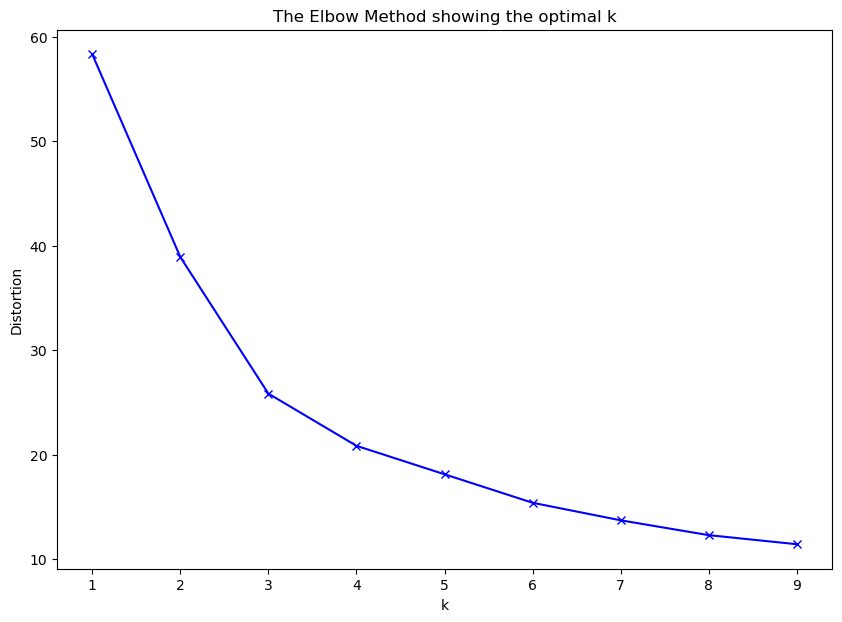

In [32]:
distortions = []
K = range(1,10)
X = np.array(clustering_df.drop(['STATION ID', 'LATITUDE', 'LONGITUDE'], 1).astype(float))
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [121]:
#clustering algo
X = np.array(clustering_df.drop(['STATION ID', 'LATITUDE', 'LONGITUDE'], 1).astype(float))
#KM = KMeans(n_clusters=5) 
KM = KMeans(n_clusters=4) 
KM.fit(X)
clusters = KM.predict(X)

locations = clustering_df
locations['Cluster'] = clusters
locations = locations.reset_index()
locations[locations['Cluster'] ==0].head(40)

CLUSTER_GROUP,NAME,STATION ID,LATITUDE,LONGITUDE,11AM-3PM Saturday,11AM-3PM Sunday,11AM-3PM Weekday,4PM-7PM Saturday,4PM-7PM Sunday,4PM-7PM Weekday,6AM-10AM Saturday,6AM-10AM Sunday,6AM-10AM Weekday,8PM-11PM Saturday,8PM-11PM Sunday,8PM-11PM Weekday,Overnight Saturday,Overnight Sunday,Overnight Weekday,Cluster
4,BOLTON STREET,3,53.351181,-6.269859,0.536943,0.500138,0.250237,0.598105,0.629525,0.167954,0.259091,0.482947,0.131464,0.613245,0.566812,0.282140,0.488776,0.620308,0.312366,0
7,CATHAL BRUGHA STREET,24,53.352150,-6.260533,0.834629,0.729185,0.271329,0.698448,0.608327,0.583022,0.739437,0.650454,0.183582,0.552919,0.303747,0.472662,0.585159,0.376275,0.258784,0
10,CHRISTCHURCH PLACE,6,53.343369,-6.270120,0.758128,0.811586,0.154808,0.767788,0.726961,0.205437,0.458967,0.721322,0.107699,0.745030,0.594460,0.272913,0.391700,0.563214,0.133966,0
15,CUSTOM HOUSE,23,53.348278,-6.254662,0.798408,0.792233,0.367958,0.695074,0.665730,0.761564,0.642292,0.657204,0.330447,0.662005,0.423911,0.531695,0.528743,0.537696,0.295382,0
16,CUSTOM HOUSE QUAY,8,53.347885,-6.248048,0.551933,0.649348,0.467519,0.546431,0.579752,0.546941,0.461446,0.509734,0.343342,0.493928,0.448668,0.236963,0.362610,0.434319,0.201443,0
17,DAME STREET,10,53.344006,-6.266802,0.917227,0.906295,0.574928,0.911890,0.820412,0.603615,0.664514,0.772801,0.409742,0.898243,0.590278,0.459202,0.384278,0.562951,0.145719,0
24,EXCHEQUER STREET,9,53.343033,-6.263578,0.795464,0.810285,0.670133,0.718257,0.590352,0.461079,0.652552,0.665146,0.549653,0.792315,0.331135,0.284120,0.208230,0.336199,0.108799,0
30,FREDERICK STREET SOUTH,98,53.341515,-6.256853,0.519460,0.686148,0.560221,0.566919,0.636206,0.233422,0.173963,0.481180,0.367456,0.534006,0.490625,0.095830,0.133071,0.493041,0.122554,0
32,GEORGES QUAY,16,53.347507,-6.252192,0.774789,0.776713,0.370493,0.742527,0.646529,0.626767,0.591152,0.683501,0.358884,0.716594,0.506156,0.351489,0.550483,0.631437,0.242955,0
33,GOLDEN LANE,17,53.340801,-6.267732,0.620492,0.799158,0.230399,0.673327,0.748193,0.183900,0.396184,0.730225,0.230373,0.692066,0.718175,0.180276,0.356475,0.667168,0.219585,0


In [57]:
colordict = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green', 4: 'purple'}
dublin_map = folium.Map([53.345, -6.2650], zoom_start=13.5)
for LATITUDE, LONGITUDE, Cluster in zip(locations['LATITUDE'],locations['LONGITUDE'], locations['Cluster']):
    folium.CircleMarker(
        [LATITUDE, LONGITUDE],
        color = 'b',
        radius = 8,
        fill_color=colordict[Cluster],
        fill=True,
        fill_opacity=0.9
        ).add_to(dublin_map)
dublin_map
    

Based on the map the location stations choosen were: 
- 'HANOVER QUAY' in Grand Canal Dock (blue) + FITZWILLIAM SQUARE EAST
- 'YORK STREET EAST' in south Dublin  (red) + 'NEW CENTRAL BANK'
- 'MATER HOSPITAL'- north side, hospital (green) (rotunda parnell st north)

In [139]:
del clustering_df

In [122]:
selected_stations = pd.DataFrame(
    {
        "NAME": ['HANOVER QUAY', 'FITZWILLIAM SQUARE EAST', 'YORK STREET EAST', 'NEW CENTRAL BANK', 
'MATER HOSPITAL', 'PARNELL SQUARE NORTH'],
        "cluster": [0, 0, 1, 1, 2, 2]
    
    }
)


In [140]:
#locals()

In [123]:
data = pd.merge(full_data, selected_stations, how='left', on = 'NAME', \
              indicator=False)
#90222 rows × 14 columns


MemoryError: Unable to allocate 1.37 GiB for an array with shape (5, 36674323) and data type object

In [135]:
data.to_csv("data/station_data.csv", index=False)

MemoryError: Unable to allocate 1.74 MiB for an array with shape (2, 7142) and data type <U32

In [144]:
#data = data.dropna()
m= [not pd.isna(c) for c in data['cluster']]
m


MemoryError: 

In [ ]:
ct = pd.crosstab(index=data['NAME'], columns=data['cluster'])
ct

In [83]:

data = data.sort_values(['NAME', 'TIME' ])

In [85]:
df.tail()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,usage,include,cluster
1162225,52,2018-09-22 23:35:02,2018-09-22 23:32:30,YORK STREET EAST,32,21,11,Open,York Street East,53.338757,-6.262003,0.0,True,1.0
1162226,52,2018-09-22 23:40:02,2018-09-22 23:32:30,YORK STREET EAST,32,21,11,Open,York Street East,53.338757,-6.262003,0.0,True,1.0
1162227,52,2018-09-22 23:45:01,2018-09-22 23:42:40,YORK STREET EAST,32,21,11,Open,York Street East,53.338757,-6.262003,0.0,True,1.0
1162228,52,2018-09-22 23:50:02,2018-09-22 23:42:40,YORK STREET EAST,32,21,11,Open,York Street East,53.338757,-6.262003,0.0,True,1.0
1162229,52,2018-09-22 23:55:01,2018-09-22 23:52:49,YORK STREET EAST,32,21,11,Open,York Street East,53.338757,-6.262003,0.0,True,1.0


In [78]:
data.to_csv("data/station_data.csv", index=False)

In [80]:
locations  = data[['LATITUDE', 'LONGITUDE', 'cluster']].drop_duplicates()

In [82]:
data.sample(50)
colordict = {0: 'blue', 1: 'red', 2: 'green'}
dublin_map = folium.Map([53.345, -6.2650], zoom_start=13.5)

for LATITUDE, LONGITUDE, cluster in zip(locations['LATITUDE'],locations['LONGITUDE'],locations['cluster']):
    folium.CircleMarker(
        [LATITUDE, LONGITUDE],
        color = 'b',
        radius = 8,
        fill_color=colordict[cluster],
        fill=True,
        fill_opacity=0.9
        ).add_to(dublin_map)
dublin_map
  

In [19]:
# write out full data to csv file

if MAKE_FILES : data.to_csv("data/station_data.csv", index=False)
#data = pd.read_csv("data/station_data.csv")


In [20]:
#df.drop(columns=["ADDRESS","LATITUDE","LONGITUDE","LAST UPDATED","NAME","STATION ID","AVAILABLE BIKE STANDS","STATUS"],axis=1,inplace=True)
#df["TIME"]=pd.to_datetime(df["TIME"])  
#df.sort_values(by=['TIME'],inplace=True)
#df["GAP AMOUNT"]=df["TIME"].diff().dt.seconds/60

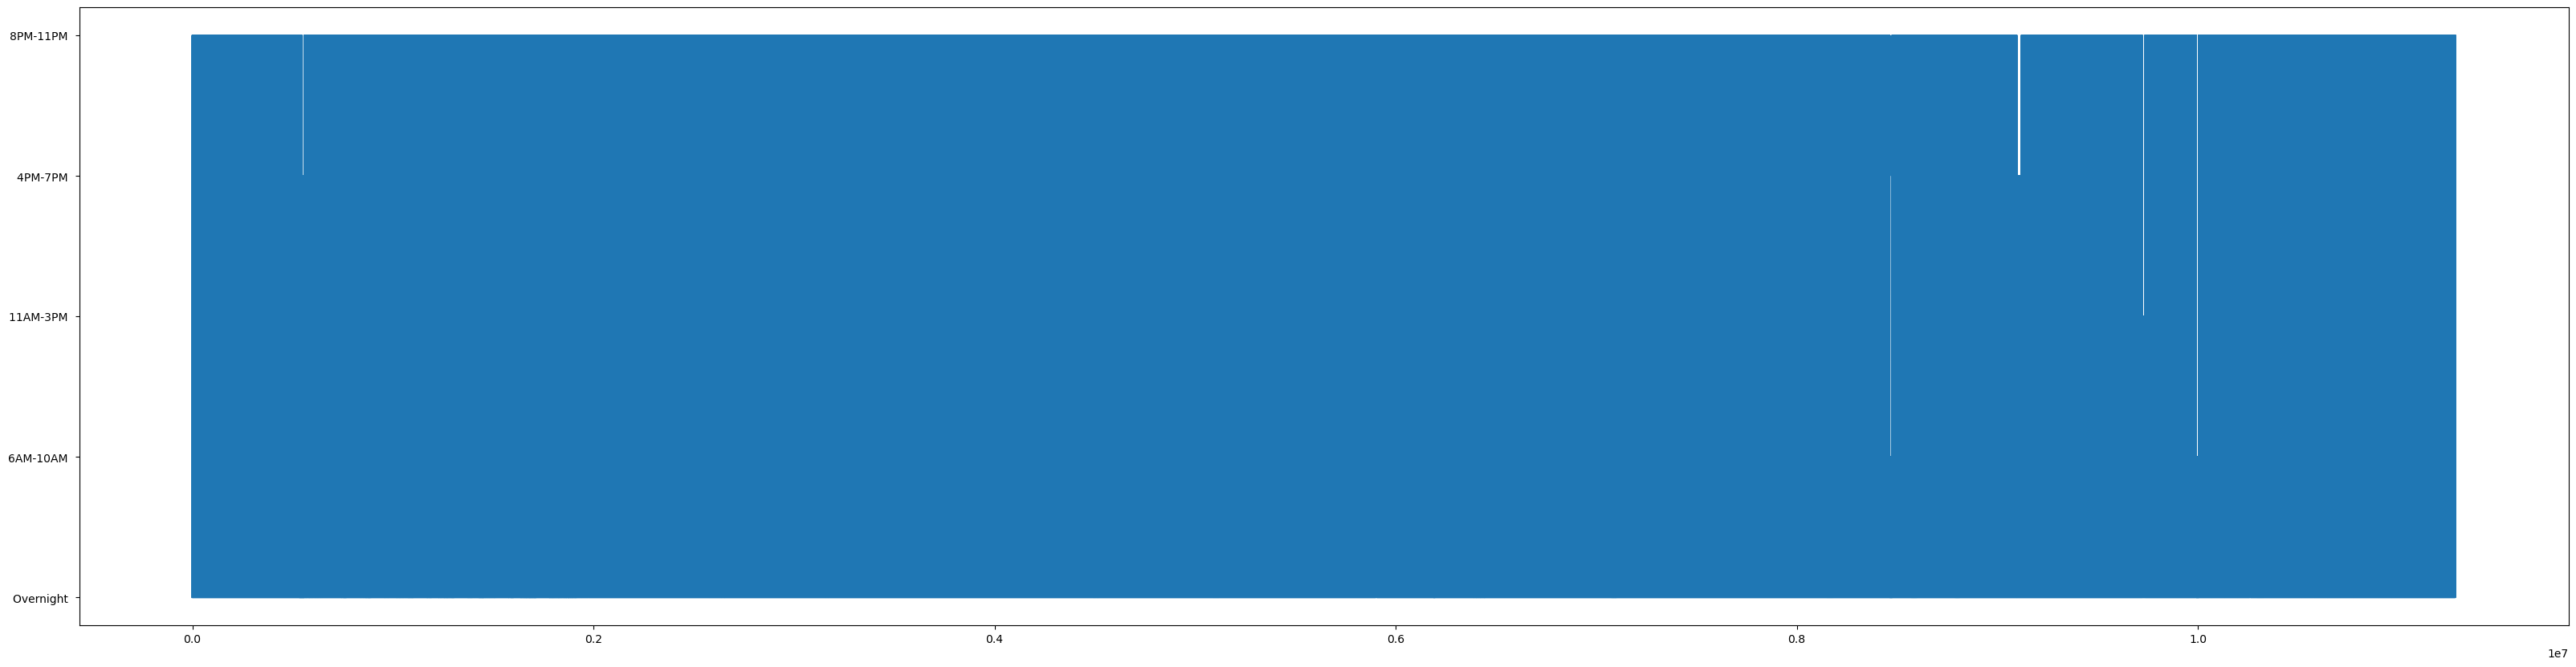

In [15]:
fig,ax = plt.subplots(1, 1, figsize=(40, 10))
ax.plot(range(0,len(data['AVAILABLE BIKES'])),data["TIME_TYPE"])
plt.show()